In [1]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import *
import math
import re
import os
import seaborn as sbn
sbn.set_style("whitegrid")

import matplotlib.image as mpimg
import glob

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
def extract_potential(ifile):
    ifile = open(ifile,"r").readlines()
    shells, nrgs, stddevs = [], [], []
    for lines in ifile:
        shell = float(lines.split(",")[0])
        nrg = float(lines.split(",")[1])
        stddev = float(lines.split(",")[2])
        shells.append(shell)
        nrgs.append(nrg)
        stddevs.append(stddev)
    return shells,nrgs,stddevs
        

In [3]:
BWRFshell,BWRFnrg,BWRFerr = extract_potential("BWRF.csv") #BWRF computed as the sum of charge-charge-charge
BWRF_c_c_s,BWRF_c_c_n,BWFRF_c_c_err = extract_potential("BWRF_charge_charge.csv") # BWRF computed as ion*dipole's charges
RF_c_d_s,RF_c_d_n,RF_c_d_err = extract_potential("RF_charge_dipole.csv")#RF charge-dipole interaction, q*mu *cos(theta)
AVGRF_s,AVGRF_n,AVGRF_err = extract_potential("AVG_RF_dipole.csv")#AVG ROT RF field computed by using waters' 
#COMs as position
AVGRF_int_s,AVGRF_int_n,AVGRF_int_err = extract_potential("AVG_RF_int_dipole.csv")#AVG computed as N times the 
#potential at the middle of the shell



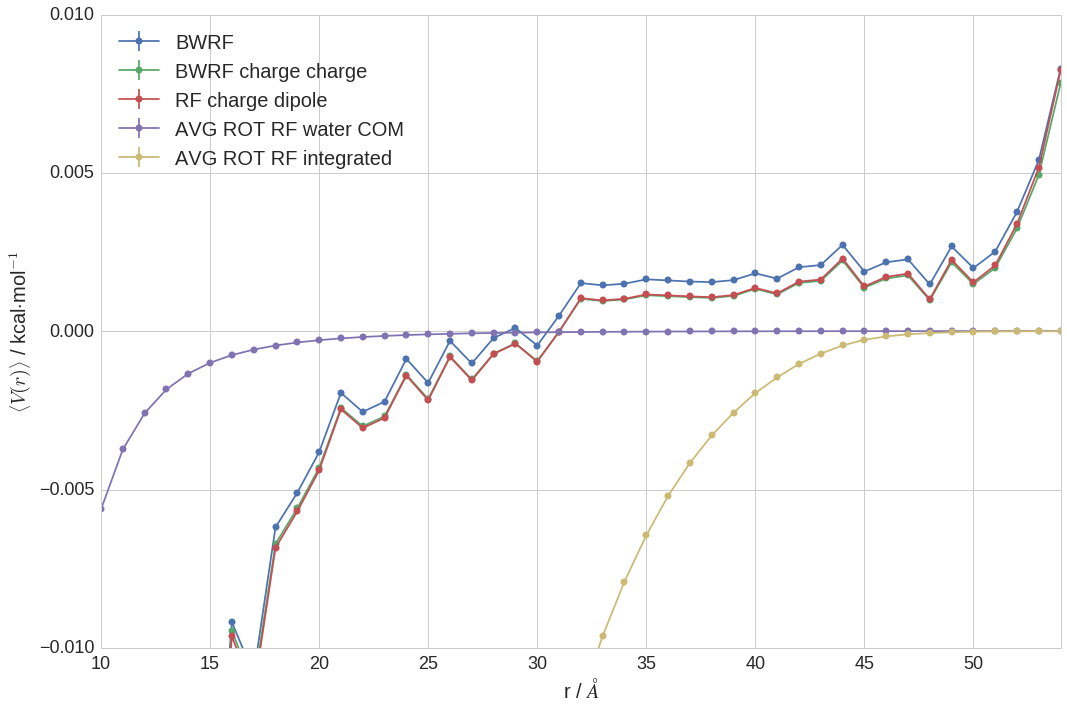

In [10]:
#plot
color = sbn.color_palette()
fig, ax = plt.subplots(figsize=(15,10))

#BWRF
ax.errorbar(BWRFshell,BWRFnrg,color=color[0],yerr=BWRFerr,marker="o",label="BWRF")
#BWRF ion-dipole's charges
ax.errorbar(BWRF_c_c_s,BWRF_c_c_n,color=color[1],yerr=BWFRF_c_c_err,marker="o",label="BWRF charge charge")
#RF charge-dipole interaction 
ax.errorbar(RF_c_d_s,RF_c_d_n,color=color[2],yerr=RF_c_d_err,marker="o",label="RF charge dipole")
#AVG ROT RF
ax.errorbar(AVGRF_s,AVGRF_n,color=color[3],yerr=AVGRF_err,marker="o",label="AVG ROT RF water COM")
#AVG ROT RF integrated
ax.errorbar(AVGRF_int_s,AVGRF_int_n,color=color[4],yerr=AVGRF_int_err,marker="o",label="AVG ROT RF integrated")

ax.set_xlabel("r / $\AA$",fontsize=20)
ax.set_ylabel(r"$\left \langle V(r) \right \rangle$ / kcal$\cdot$mol$^{-1}$" ,fontsize=20)
ax.legend(loc="best",fontsize=20)
ax.tick_params(labelsize=18)
ax.set_xlim(10,54)
ax.set_ylim(-0.01,0.01)


plt.tight_layout()
